In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'1.0.1'

In [4]:
import requests
import json
#import imdb
import time
import itertools
import wget
import os
import pickle

import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster.bicluster import SpectralCoclustering
from sklearn.metrics import precision_recall_curve
import scipy

sns.set_style('white')

import tensorflow as tf
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model

Using TensorFlow backend.


In [5]:

from __future__ import print_function

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout

from keras.optimizers import SGD

from keras import initializers
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

from keras import backend as K

import matplotlib.pyplot as plt

In [6]:
keras.__version__

'2.0.2'

In [7]:
import warnings
# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

Default GPU Device: /gpu:0


In [8]:
num_classes = 8

In [9]:
### load data
import numpy as np

data_x_MLP = np.load("data_image_5000.npy")
data_x = np.load("data_image_cnn_5000.npy")
data_y = np.load("data_genre_5000.npy")

In [10]:
data_y = data_y.astype(float)

### load data
import numpy as np

data_x_MLP = np.load("data_image_try.npy")
data_x = np.load("data_image_cnn_try.npy")
data_y = np.load("data_genre_try.npy")


## MLP

In [10]:
def base_MLP(x, y, batch_size = 128, num_classes = 8, epochs = 50, unit = 20, lr = 0.01, momentum = 0.9,
             validation_ratio = 0.2, regularizer = None, verbose = 1):

    ### ------- Baseline MLP - Layers ------- ###
    model = Sequential()
    # add an input layer
    model.add(Dense(unit, activation='relu', input_shape=(150528,))) # input picture size: 224x224x3
    # this is our hidden layer
    model.add(Dense(unit, activation='relu', kernel_regularizer=None))
    # and an output layer
    model.add(Dense(num_classes, activation='sigmoid'))
    # prints out a summary of the model architecture
    #model.summary()

    ### ------- Baseline MLP - Optimization ------- ###
    sgd = SGD(lr=lr, momentum=momentum)  # momentum = [0.9, 0.99]
    model.compile(loss='binary_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])

    ### ------- Baseline MLP - Train Model ------- ###
    history = model.fit(x, y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=verbose,
                        validation_split=validation_ratio)
    
    return (model, history)

In [11]:
%%time
###### Baseline MLP - Parameters ######
model0, history0 = base_MLP(x = data_x_MLP, y = data_y, batch_size = 128, num_classes = 8, 
                   epochs = 50, unit = 20, lr = 0.1, momentum = 0.9, 
             validation_ratio = 0.2, regularizer = None, verbose = 0) # verbose = 0 for no logging to stdout

CPU times: user 3min 26s, sys: 1min 18s, total: 4min 44s
Wall time: 5min 2s


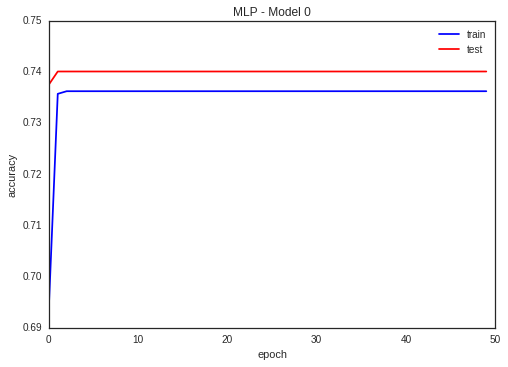

In [12]:
### Baseline MLP - Evaluation ###
plt.plot(history0.history['acc'], color = 'blue', label = 'train')
plt.plot(history0.history['val_acc'], color = 'red', label = 'test')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.title('MLP - Model 0')
plt.show()

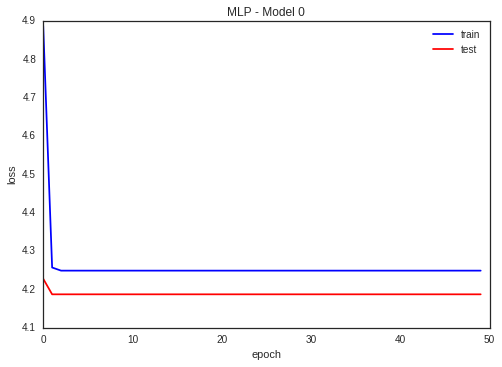

In [13]:
### Baseline MLP - Evaluation ###
plt.plot(history0.history['loss'], color = 'blue', label = 'train')
plt.plot(history0.history['val_loss'], color = 'red', label = 'test')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title('MLP - Model 0')
plt.show()

In [14]:
model0.predict(data_x_MLP[0:20])

array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

In [15]:
score, acc = model0.evaluate(data_x_MLP, data_y)
print(score, acc)

4865/4865 [==============================] - 7s     

### Smaller learning rate and add L2 regularization

In [16]:
%%time
###### MLP Model1 - L2 Regularization ######
model1, history1 = base_MLP(x = data_x_MLP, y = data_y, batch_size = 128, num_classes = 8, 
                   epochs = 50, unit = 20, lr = 0.001, momentum = 0.9, 
             validation_ratio = 0.2, regularizer = regularizers.l2(0.01), verbose = 0)

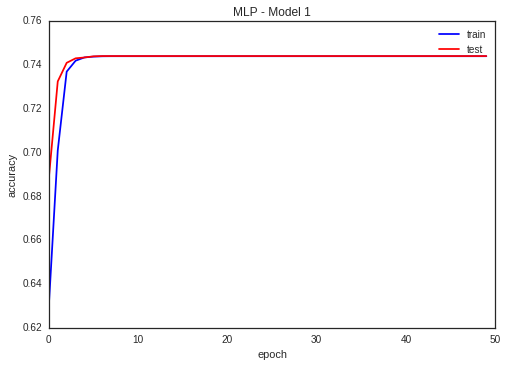

In [17]:
### Baseline MLP - Evaluation ###
plt.plot(history1.history['acc'], color = 'blue', label = 'train')
plt.plot(history1.history['val_acc'], color = 'red', label = 'test')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.title('MLP - Model 1')
plt.show()

In [18]:
score, acc = model1.evaluate(data_x_MLP, data_y)
print(score, acc)

4865/4865 [==============================] - 7s     

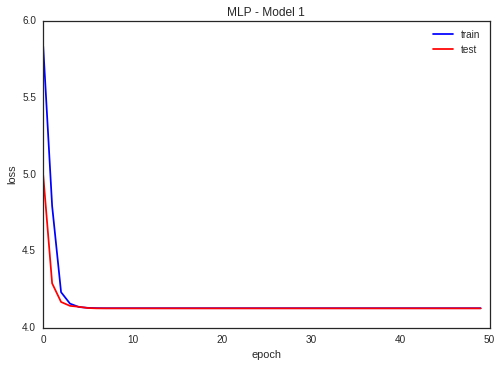

In [19]:
### Baseline MLP - Evaluation ###
plt.plot(history1.history['loss'], color = 'blue', label = 'train')
plt.plot(history1.history['val_loss'], color = 'red', label = 'test')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title('MLP - Model 1')
plt.show()

In [20]:
model1.predict((data_x_MLP[0:20]))

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

### Smaller batch size, more nodes and more epochs

In [21]:
%%time
###### MLP Model2 - L2 Regularization ######
model2, history2 = base_MLP(x = data_x_MLP, y = data_y, batch_size = 32, num_classes = 8, 
                   epochs = 200, unit = 40, lr = 0.001, momentum = 0.9, 
             validation_ratio = 0.2, regularizer = regularizers.l2(0.01), verbose = 0)

CPU times: user 17min 34s, sys: 3min 21s, total: 20min 55s
Wall time: 26min 12s


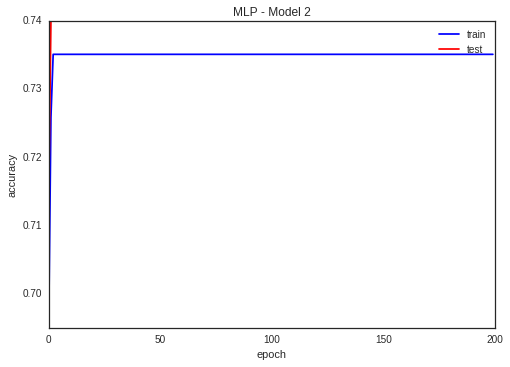

In [22]:
### Baseline MLP - Evaluation ###
plt.plot(history2.history['acc'], color = 'blue', label = 'train')
plt.plot(history2.history['val_acc'], color = 'red', label = 'test')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.title('MLP - Model 2')
plt.show()

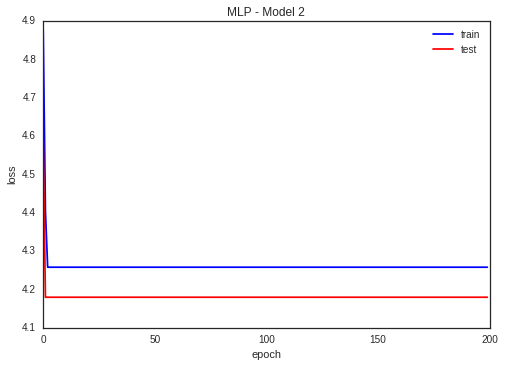

In [23]:
### Baseline MLP - Evaluation ###
plt.plot(history2.history['loss'], color = 'blue', label = 'train')
plt.plot(history2.history['val_loss'], color = 'red', label = 'test')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title('MLP - Model 2')
plt.show()

In [24]:
score, acc = model2.evaluate(data_x_MLP, data_y)
print(score, acc)

4865/4865 [==============================] - 7s     

In [25]:
model2.predict(data_x_MLP[0:20])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]], dtype=float32)

### Extra layers

In [26]:
###### MLP Model3 - extra hidden layer and Dropout layer ######

from keras.layers import Dropout

model3 = Sequential()
model3.add(Dense(64, activation='relu', input_shape=(150528,))) # input picture size: 224x224x3
model3.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model3.add(Dropout(0.5))
model3.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model3.add(Dense(8, activation='sigmoid'))


sgd = SGD(lr=0.1, momentum=0.9)  # momentum = [0.9, 0.99]
model3.compile(loss='binary_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])


history3 = model3.fit(data_x_MLP, data_y,
                    batch_size=32,
                    epochs=200,
                    verbose=0,
                    validation_split=0.2)

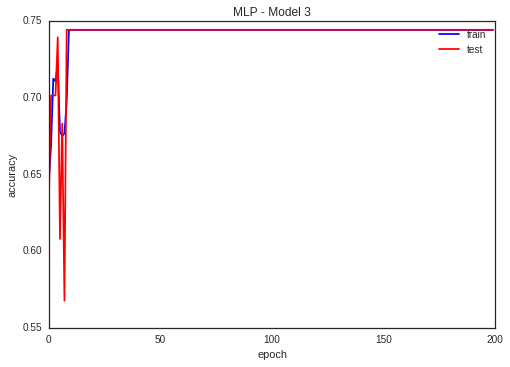

In [27]:
### Baseline MLP - Evaluation ###
plt.plot(history3.history['acc'], color = 'blue', label = 'train')
plt.plot(history3.history['val_acc'], color = 'red', label = 'test')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.title('MLP - Model 3')
plt.show()

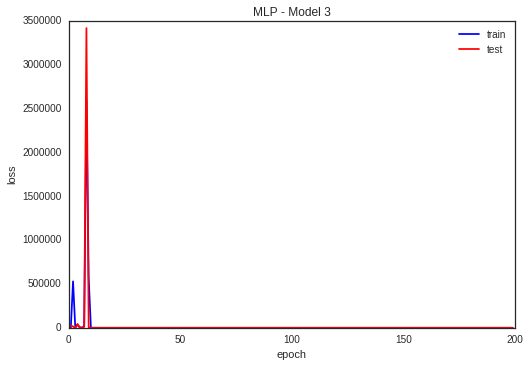

In [28]:
### Baseline MLP - Evaluation ###
plt.plot(history3.history['loss'], color = 'blue', label = 'train')
plt.plot(history3.history['val_loss'], color = 'red', label = 'test')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title('MLP - Model 3')
plt.show()

In [29]:
score, acc = model3.evaluate(data_x_MLP, data_y)
print(score, acc)

4865/4865 [==============================] - 7s     

In [30]:
model3.predict(data_x_MLP[0:20])

array([[ 0.23655024,  0.21947697,  0.13665253,  0.12649669,  0.32543007,
         0.18176743,  0.46275154,  0.35305178],
       [ 0.23655024,  0.21947697,  0.13665253,  0.12649669,  0.32543007,
         0.18176743,  0.46275154,  0.35305178],
       [ 0.23655024,  0.21947697,  0.13665253,  0.12649669,  0.32543007,
         0.18176743,  0.46275154,  0.35305178],
       [ 0.23655024,  0.21947697,  0.13665253,  0.12649669,  0.32543007,
         0.18176743,  0.46275154,  0.35305178],
       [ 0.23655024,  0.21947697,  0.13665253,  0.12649669,  0.32543007,
         0.18176743,  0.46275154,  0.35305178],
       [ 0.23655024,  0.21947697,  0.13665253,  0.12649669,  0.32543007,
         0.18176743,  0.46275154,  0.35305178],
       [ 0.23655024,  0.21947697,  0.13665253,  0.12649669,  0.32543007,
         0.18176743,  0.46275154,  0.35305178],
       [ 0.23655024,  0.21947697,  0.13665253,  0.12649669,  0.32543007,
         0.18176743,  0.46275154,  0.35305178],
       [ 0.23655024,  0.21947697

# CNN

### Baseline model

In [31]:
he = initializers.he_normal()  # initializer

### ------- Baseline CNN - Layers ------- ###
model = Sequential()
# add [kernel_initializer] and [kernel_regularizer] for each activation layer
model.add(Conv2D(32, kernel_size=(3, 3), strides = 4, activation='relu', 
                 kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01),
                 name = "block1_conv1",
                 input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(3, 3), name = "block1_pool"))
model.add(Dropout(0.5))  # dropout layer
model.add(Conv2D(32, kernel_size=(3, 3), strides = 2, activation='relu', 
          kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01), name = "block2_conv1"))
model.add(MaxPooling2D(pool_size=(2, 2), name = "block2_pool"))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

# and an output layer
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 56, 56, 32)        896       
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 18, 18, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 18, 18, 32)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 8, 8, 32)          9248      
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                32832     
__________

In [32]:
### Parameters
lr = 0.001
momentum = 0.9
batch_size = 256
epochs = 100

In [33]:
## learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=10, min_lr=lr/100.0)

## early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_acc', patience=50)

callbacks_list = [early_stopping, reduce_lr]

In [34]:
### ------- Baseline CNN - Optimization ------- ###
sgd = SGD(lr=lr, momentum=momentum)  # momentum = [0.9, 0.99]
model.compile(loss='binary_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])

In [35]:
%%time
### ------- Baseline CNN - Train Model ------- ###
history0_CNN = model.fit(data_x, data_y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_split=0.2,
                        callbacks = callbacks_list)

CPU times: user 3min 33s, sys: 1min 32s, total: 5min 6s
Wall time: 5min 16s


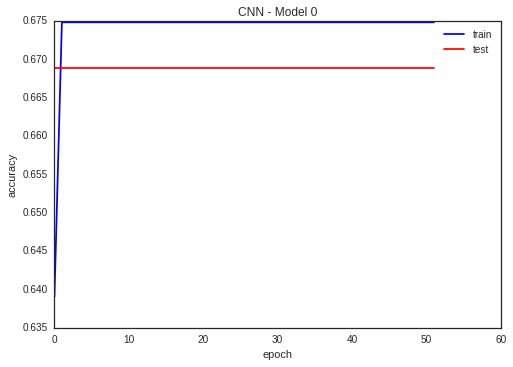

In [36]:
### Baseline CNN - Evaluation ###
plt.plot(history0_CNN.history['acc'], color = 'blue', label = 'train')
plt.plot(history0_CNN.history['val_acc'], color = 'red', label = 'test')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.title('CNN - Model 0')
plt.show()

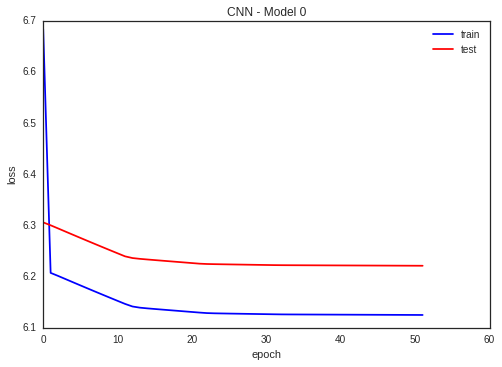

In [37]:
### Baseline CNN - Evaluation ###
plt.plot(history0_CNN.history['loss'], color = 'blue', label = 'train')
plt.plot(history0_CNN.history['val_loss'], color = 'red', label = 'test')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title('CNN - Model 0')
plt.show()

In [39]:
score, acc = model.evaluate(data_x, data_y)
print(score, acc)

4832/4865 [============================>.] - ETA: 0s

In [40]:
model.predict(data_x[0:20])

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

-----

### Multi-block before pooling

In [41]:
he = initializers.he_normal()  # initializer
### ------- Improved CNN - Layers ------- ###
model = Sequential()
# add [kernel_initializer] and [kernel_regularizer] for each activation layer
model.add(Conv2D(32, kernel_size=(6, 6), strides = 2, activation='relu', 
                 kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01),
                 name = "block1_conv1",
                 input_shape=(224,224,3)))
model.add(Conv2D(32, kernel_size=(6, 6), strides = 1, activation='relu', 
                 kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01),
                 name = "block1_conv2",
                 input_shape=(224,224,3)))

model.add(MaxPooling2D(pool_size=(2, 2), name = "block1_pool"))


model.add(Conv2D(32, kernel_size=(5, 5), strides = 1, activation='relu', 
          kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01), name = "block2_conv1"))
model.add(Conv2D(32, kernel_size=(5, 5), strides = 1, activation='relu', 
          kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01), name = "block2_conv2"))

model.add(MaxPooling2D(pool_size=(2, 2), name = "block2_pool"))


model.add(Conv2D(32, kernel_size=(3, 3), strides = 1, activation='relu', 
          kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01), name = "block3_conv1"))
model.add(Conv2D(32, kernel_size=(3, 3), strides = 1, activation='relu', 
          kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01), name = "block3_conv2"))

model.add(MaxPooling2D(pool_size=(2, 2), name = "block3_pool"))


model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(64, activation='relu'))

# and an output layer
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 110, 110, 32)      3488      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 105, 105, 32)      36896     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 52, 52, 32)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 32)        25632     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 44, 44, 32)        25632     
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 22, 22, 32)        0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 20, 20, 32)        9248      
__________

In [42]:
### Parameters
lr = 0.001
momentum = 0.9
batch_size = 256
epochs = 100
## learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=10, min_lr=lr/100.0)

## early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_acc', patience=50)

callbacks_list = [early_stopping, reduce_lr]

sgd = SGD(lr=lr, momentum=momentum)  # momentum = [0.9, 0.99]
model.compile(loss='binary_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])

In [43]:
%%time

history1_CNN = model.fit(data_x, data_y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_split=0.2,
                        callbacks = callbacks_list)

CPU times: user 7min 36s, sys: 2min 19s, total: 9min 55s
Wall time: 12min 12s


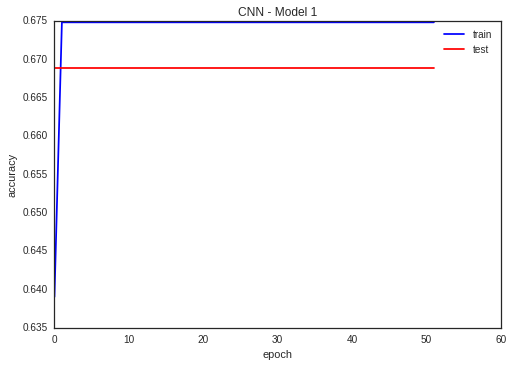

In [44]:
### CNN - Evaluation ###
plt.plot(history1_CNN.history['acc'], color = 'blue', label = 'train')
plt.plot(history1_CNN.history['val_acc'], color = 'red', label = 'test')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.title('CNN - Model 1')
plt.show()

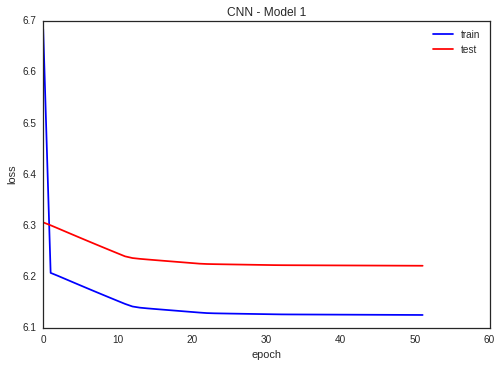

In [45]:
### CNN - Evaluation ###
plt.plot(history1_CNN.history['loss'], color = 'blue', label = 'train')
plt.plot(history1_CNN.history['val_loss'], color = 'red', label = 'test')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title('CNN - Model 1')
plt.show()

In [46]:
score, acc = model.evaluate(data_x, data_y)
print(score, acc)

4864/4865 [============================>.] - ETA: 0s 

In [47]:
model.predict(data_x[0:20])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]], dtype=float32)

### Add dropout

In [48]:
he = initializers.he_normal()  # initializer
### ------- Improved CNN - Layers ------- ###
model = Sequential()
# add [kernel_initializer] and [kernel_regularizer] for each activation layer
model.add(Conv2D(32, kernel_size=(6, 6), strides = 2, activation='relu', 
                 kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01),
                 name = "block1_conv1",
                 input_shape=(224,224,3)))
model.add(Conv2D(32, kernel_size=(6, 6), strides = 1, activation='relu', 
                 kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01),
                 name = "block1_conv2",
                 input_shape=(224,224,3)))

model.add(MaxPooling2D(pool_size=(2, 2), name = "block1_pool"))
model.add(Dropout(0.2))  # dropout layer

model.add(Conv2D(32, kernel_size=(5, 5), strides = 1, activation='relu', 
          kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01), name = "block2_conv1"))
model.add(Conv2D(32, kernel_size=(5, 5), strides = 1, activation='relu', 
          kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01), name = "block2_conv2"))

model.add(MaxPooling2D(pool_size=(2, 2), name = "block2_pool"))
model.add(Dropout(0.5))  # dropout layer

model.add(Conv2D(32, kernel_size=(3, 3), strides = 1, activation='relu', 
          kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01), name = "block3_conv1"))
model.add(Conv2D(32, kernel_size=(3, 3), strides = 1, activation='relu', 
          kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01), name = "block3_conv2"))

model.add(MaxPooling2D(pool_size=(2, 2), name = "block3_pool"))
model.add(Dropout(0.5))  # dropout layer

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # dropout layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # dropout layer
# and an output layer
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 110, 110, 32)      3488      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 105, 105, 32)      36896     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 52, 52, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 52, 52, 32)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 32)        25632     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 44, 44, 32)        25632     
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 22, 22, 32)        0         
__________

In [49]:
### Parameters
lr = 0.001
momentum = 0.9
batch_size = 256
epochs = 100
## learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=10, min_lr=lr/100.0)

## early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_acc', patience=50)

callbacks_list = [early_stopping, reduce_lr]

sgd = SGD(lr=lr, momentum=momentum)  # momentum = [0.9, 0.99]
model.compile(loss='binary_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])

In [50]:
%%time

history2_CNN = model.fit(data_x, data_y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_split=0.2,
                        callbacks = callbacks_list)

CPU times: user 7min 38s, sys: 2min 21s, total: 10min
Wall time: 12min 26s


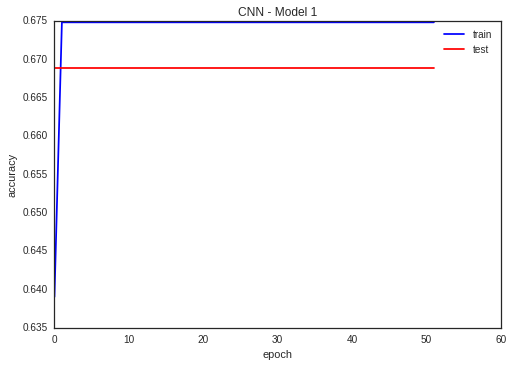

In [51]:
### CNN - Evaluation ###
plt.plot(history2_CNN.history['acc'], color = 'blue', label = 'train')
plt.plot(history2_CNN.history['val_acc'], color = 'red', label = 'test')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.title('CNN - Model 1')
plt.show()

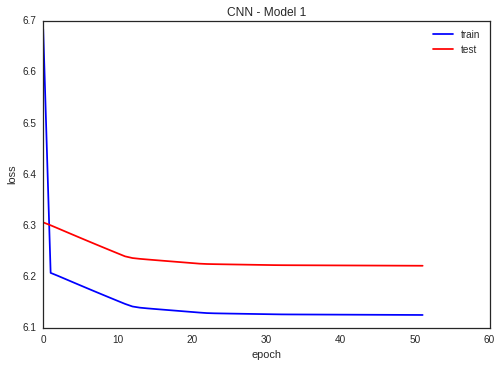

In [52]:
### CNN - Evaluation ###
plt.plot(history2_CNN.history['loss'], color = 'blue', label = 'train')
plt.plot(history2_CNN.history['val_loss'], color = 'red', label = 'test')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title('CNN - Model 1')
plt.show()

In [53]:
score, acc = model.evaluate(data_x, data_y)
print(score, acc)

4864/4865 [============================>.] - ETA: 0s

In [54]:
model.predict(data_x[0:20])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

----

### small kernel, large MLP layer

In [11]:
he = initializers.he_normal()  # initializer
### ------- Improved CNN - Layers ------- ###
model = Sequential()
# add [kernel_initializer] and [kernel_regularizer] for each activation layer
model.add(Conv2D(32, kernel_size=(3, 3), strides = 2, activation='relu', 
                 kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01),
                 name = "block1_conv1",
                 input_shape=(224,224,3)))
model.add(Conv2D(32, kernel_size=(3, 3), strides = 1, activation='relu', 
                 kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01),
                 name = "block1_conv2",
                 input_shape=(224,224,3)))

model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2), name = "block1_pool"))
model.add(Dropout(0.2))  # dropout layer

model.add(Conv2D(64, kernel_size=(3, 3), strides = 1, activation='relu', 
          kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01), name = "block2_conv1"))
model.add(Conv2D(64, kernel_size=(3, 3), strides = 1, activation='relu', 
          kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01), name = "block2_conv2"))

model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2), name = "block2_pool"))
model.add(Dropout(0.5))  # dropout layer

model.add(Conv2D(128, kernel_size=(3, 3), strides = 1, activation='relu', 
          kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01), name = "block3_conv1"))
model.add(Conv2D(128, kernel_size=(3, 3), strides = 1, activation='relu', 
          kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01), name = "block3_conv2"))

model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2), name = "block3_pool"))
model.add(Dropout(0.5))  # dropout layer


model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))  # dropout layer
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))  # dropout layer

# and an output layer
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 111, 111, 32)      896       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 109, 109, 32)      9248      
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 32)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 52, 52, 64)        18496     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
__________

In [12]:
### Parameters
lr = 0.001
momentum = 0.9
batch_size = 256
epochs = 100
## learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=10, min_lr=lr/100.0)

## early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_acc', patience=50)

callbacks_list = [early_stopping, reduce_lr]

sgd = SGD(lr=lr, momentum=momentum)  # momentum = [0.9, 0.99]
model.compile(loss='binary_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])

In [13]:
%%time

history3_CNN = model.fit(data_x, data_y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_split=0.2,
                        callbacks = callbacks_list)

CPU times: user 12min 11s, sys: 2min 31s, total: 14min 42s
Wall time: 15min 10s


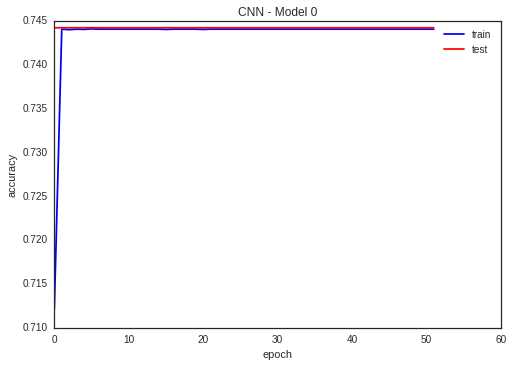

In [14]:
### Baseline CNN - Evaluation ###
plt.plot(history3_CNN.history['acc'], color = 'blue', label = 'train')
plt.plot(history3_CNN.history['val_acc'], color = 'red', label = 'test')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.title('CNN - Model 0')
plt.show()

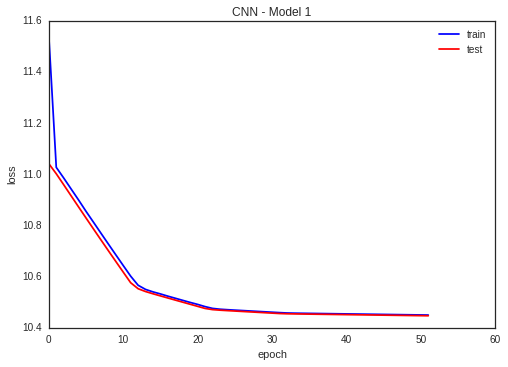

In [15]:
### CNN - Evaluation ###
plt.plot(history3_CNN.history['loss'], color = 'blue', label = 'train')
plt.plot(history3_CNN.history['val_loss'], color = 'red', label = 'test')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title('CNN - Model 1')
plt.show()

In [17]:
score, acc = model.evaluate(data_x, data_y)
print(score, acc)

4864/4865 [============================>.] - ETA: 0s 

In [18]:
model.predict(data_x[0:20])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

-----

### Adam or Momentum as optimization algorithms

In [1]:
he = initializers.he_normal()  # initializer
### ------- Improved CNN - Layers ------- ###
model = Sequential()
# add [kernel_initializer] and [kernel_regularizer] for each activation layer
model.add(Conv2D(32, kernel_size=(3, 3), strides = 2, activation='relu', 
                 kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01),
                 name = "block1_conv1",
                 input_shape=(224,224,3)))
model.add(Conv2D(32, kernel_size=(3, 3), strides = 1, activation='relu', 
                 kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01),
                 name = "block1_conv2",
                 input_shape=(224,224,3)))

model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2), name = "block1_pool"))
model.add(Dropout(0.2))  # dropout layer

model.add(Conv2D(64, kernel_size=(3, 3), strides = 1, activation='relu', 
          kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01), name = "block2_conv1"))
model.add(Conv2D(64, kernel_size=(3, 3), strides = 1, activation='relu', 
          kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01), name = "block2_conv2"))

model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2), name = "block2_pool"))
model.add(Dropout(0.5))  # dropout layer

model.add(Conv2D(128, kernel_size=(3, 3), strides = 1, activation='relu', 
          kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01), name = "block3_conv1"))
model.add(Conv2D(128, kernel_size=(3, 3), strides = 1, activation='relu', 
          kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01), name = "block3_conv2"))

model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2), name = "block3_pool"))
model.add(Dropout(0.5))  # dropout layer


model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))  # dropout layer
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))  # dropout layer

# and an output layer
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

NameError: name 'initializers' is not defined

In [28]:
### Parameters
lr = 0.001
momentum = 0.9
batch_size = 256
epochs = 100
## learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=10, min_lr=lr/100.0)

## early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_acc', patience=50)

callbacks_list = [early_stopping, reduce_lr]

model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
                  metrics=['accuracy'])

In [29]:
%%time

history4 = model.fit(data_x, data_y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_split=0.2,
                        callbacks = callbacks_list)

CPU times: user 13min 27s, sys: 2min 41s, total: 16min 9s
Wall time: 16min 40s


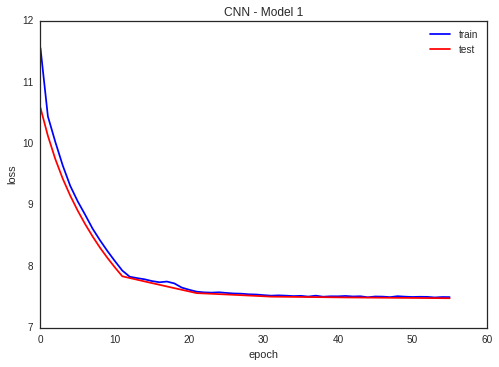

In [31]:
### CNN - Evaluation ###
plt.plot(history4.history['loss'], color = 'blue', label = 'train')
plt.plot(history4.history['val_loss'], color = 'red', label = 'test')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title('CNN - Model 1')
plt.show()

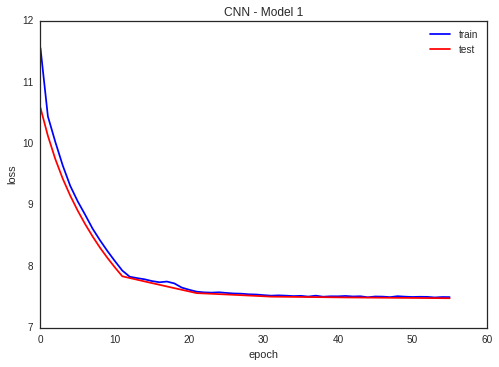

In [32]:
### CNN - Evaluation ###
plt.plot(history4.history['loss'], color = 'blue', label = 'train')
plt.plot(history4.history['val_loss'], color = 'red', label = 'test')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title('CNN - Model 1')
plt.show()

In [33]:
score, acc = model.evaluate(data_x, data_y)
print(score, acc)

4864/4865 [============================>.] - ETA: 0s 

In [34]:
model.predict(data_x[0:20])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)